# 卷积神经网络（CNN）
- 对于计算机视觉的分类任务，在很长一段时间里流行的是研究者通过经验与智慧所设计并生成的手工特征。这类图像分类研究的主要流程是：
    - 获取图像数据集；
    - 使用已有的特征提取函数生成图像的特征；
    - 使用机器学习模型对图像的特征分类。
- 卷积神经网络就是含有卷积层的神经网络，深度卷积神经网络的兴起改变了计算机视觉任务中手工设计特征的传统，引领了诸多影响深远的研究。

## LeNet
- LeNet作为一个早期用来识别手写数字图像的卷积神经网络，展示了通过梯度下降训练卷积神经网络可以达到手写数字识别在当时最先进的结果。如下图所示：
<center/><img src="https://cdn.nlark.com/yuque/0/2021/svg/1508544/1616470769150-17a289a6-5684-442e-898d-ddf5e84145ee.svg"/></center>

- LeNet的模型结构分为卷积层块和全连接层块两个部分：
    - 卷积层保留输入形状，使图像的像素在高和宽两个方向上的相关性均可能被有效识别，并且通过滑动窗口将同一卷积核与不同位置的输入重复计算，从而避免参数尺寸过大。
    - 全连接层块将卷积层块的输出中每个样本展平，即输入形状将变成二维，其中第一维是小批量中的样本，第二维是每个样本展平后的向量表示，从而进行分类。

## AlexNet
- 2012年，AlexNet横空出世，使用了8层卷积神经网络，并以很大的优势赢得了ImageNet 2012图像识别挑战赛。
- AlexNet与LeNet的设计理念非常相似，但相对较小的LeNet相比，AlexNet包含5层卷积和2层全连接隐藏层，以及1个全连接输出层，模型参数也大大增加。由于早期显存的限制，最早的AlexNet使用双数据流的设计，使一个GPU只需处理一半模型。如下图所示：
<center/><img src="https://cdn.nlark.com/yuque/0/2021/png/1508544/1616471381245-3f28bb8d-a84a-44b0-a0b2-9c91145b0587.png"/></center>  
- AlexNet首次证明了神经网络以端到端（end-to-end）的方式学习到的特征可以超越手工设计的特征，从而一举打破计算机视觉研究的前状。
【端到端：输入原始数据而非处理过的特征值(模型自行获取特征)】

## VGG
- AlexNet在LeNet的基础上增加了3个卷积层，同时对网络的卷积窗口、输出通道数和构造顺序均做了大量的调整。
- AlexNet指明了深度卷积神经网络可以取得出色的结果，基于这一个理念，牛津大学的实验室Visual Geometry Group实验室提出了VGG网络，提供了通过重复使用简单的基础块来构建深度模型的思路。VGG每个基础块组成规律是：连续使用数个相同的填充为1、窗口形状为3×3的卷积层后接上一个步幅为2、窗口形状为2×2的最大池化层。卷积层保持输入的高和宽不变，而池化层则对其减半。如下图所示：
<center/><img src="https://cdn.nlark.com/yuque/0/2021/jpeg/1508544/1616471595648-5620d798-45f2-477e-bce0-dbfa20115c7d.jpeg"/></center>  
- 可以看到，每次经过基础块以后，网络会将输入的高和宽减半，直到最终高和宽变成7后传入全连接层。与此同时，输出通道数每次翻倍，直到变成512。因为每个卷积层的窗口大小一样，VGG这种高和宽减半以及通道翻倍的设计使得多数卷积层都有相同的模型参数尺寸和计算复杂度。

## NiN
- 之前介绍的LeNet、AlexNet和VGG在设计上的共同之处是：先以由卷积层构成的模块充分抽取空间特征，再以由全连接层构成的模块来输出分类结果。其中，AlexNet和VGG对LeNet的改进主要在于如何对这两个模块加宽（增加通道数）和加深。网络中的网络（NiN）提出了另外一个思路，即串联多个由卷积层和“全连接”层构成的小网络来构建一个深层网络。
- 卷积层的输入和输出通常是四维数组（样本，通道，高，宽），而全连接层的输入和输出则通常是二维数组（样本，特征）。如果想在全连接层后再接上卷积层，则需要将全连接层的输出变换为四维，1×1卷积层可以看成全连接层，其中空间维度（高和宽）上的每个元素相当于样本，通道相当于特征。因此，NiN使用1×1卷积层来替代全连接层，从而使空间信息能够自然传递到后面的层中去。下图对比了NiN同AlexNet和VGG等网络在结构上的主要区别。
<center/><img src="https://cdn.nlark.com/yuque/0/2021/svg/1508544/1616471725212-1ad26a46-a76d-40c5-a903-e921c59423e2.svg"/></center>  
- NiN块是NiN中的基础块。它由一个卷积层加两个充当全连接层的1×1卷积层串联而成。其中第一个卷积层的超参数可以自行设置，而第二和第三个卷积层的超参数一般是固定的。

## GooLeNet
- 在2014年的ImageNet图像识别挑战赛中，一个名叫GoogLeNet的网络结构大放异彩，它虽然在名字上向LeNet致敬，但在网络结构上已经很难看到LeNet的影子。GoogLeNet吸收了NiN中网络串联网络的思想，并在此基础上做了很大改进。GoogLeNet中的基础卷积块叫作Inception块，得名于同名电影《盗梦空间》（Inception）。与上NiN块相比，这个基础块在结构上更加复杂，如下图所示：
<center/><img src="https://cdn.nlark.com/yuque/0/2021/svg/1508544/1616471806299-c2f191ba-cb6b-4a7c-8720-b8d9c4b7c802.svg"/></center>  
- Inception块里有4条并行的线路。前3条线路使用窗口大小分别是1×1、3×3和5×5的卷积层来抽取不同空间尺寸下的信息，其中中间2个线路会对输入先做1×1卷积来减少输入通道数，以降低模型复杂度。第四条线路则使用3×3最大池化层，后接1×1卷积层来改变通道数。4条线路都使用了合适的填充来使输入与输出的高和宽一致。最后将每条线路的输出在通道维上连结，并输入接下来的层中去。Inception块中可以自定义的超参数是每个层的输出通道数，以此来控制模型复杂度。

# Fashion-mnist分类任务
<center/><img src="https://cdn.nlark.com/yuque/0/2021/jpeg/1508544/1613798010557-8a28fd24-ca7f-443c-9c70-d2366010d5eb.jpeg"/></center>

## Fashion-mnist
- [经典的MNIST数据集](http://yann.lecun.com/exdb/mnist/)包含了大量的手写数字。十几年来，来自机器学习、机器视觉、人工智能、深度学习领域的研究员们把这个数据集作为衡量算法的基准之一。你会在很多的会议，期刊的论文中发现这个数据集的身影。实际上，MNIST数据集已经成为算法作者的必测的数据集之一。有人曾经调侃道：“如果一个算法在MNIST不work，那么它就根本没法用；而如果它在MNIST上work，它在其它数据上也可能不work！”
- **Fashion-mnist**的目的是要成为MNIST数据集的一个直接替代品。作为算法作者，你不需要修改任何代码，就可以直接使用这个数据集。**Fashion-mnist**的图片大小，训练、测试样本数及类别数与经典MNIST**完全相同**。
- 这个数据集的样子大致如下（每个类别占三行）：
<center/><img src="https://cdn.nlark.com/yuque/0/2021/jpeg/1508544/1614584630615-e95e380f-dfe9-48be-83ce-1b0ae488d42f.jpeg?x-oss-process=image/resize,w_633"/></center>

## 类别标注
• 在Fashion-mnist数据集中，每个训练样本都按照以下类别进行了标注：

|**标注编号**|**描述**|
|---|---|
|0|T-shirt/top（T恤）|
|1|Trouser（裤子）|
|2|Pullover（套衫）|
|3|Dress（裙子）|
|4|Coat（外套）|
|5|Sandal（凉鞋）|
|6|Shirt（汗衫）|
|7|Sneaker（运动鞋）|
|8|Bag（包）|
|9|Ankle boot（踝靴）|

## 任务描述
- Fashion-mnist是一个替代[MNIST手写数字集](http://yann.lecun.com/exdb/mnist/)的图像数据集。它是由Zalando（一家德国的时尚科技公司）旗下的[研究部门](https://research.zalando.com/)提供。其涵盖了来自10种类别的共7万个不同商品的正面图片。Fashion-mnist的大小、格式和训练集/测试集划分与原始的MNIST完全一致。60000/10000的训练测试数据划分，28×28的灰度图片。你可以直接用它来测试你的机器学习和深度学习算法性能，且不需要改动任何的代码。
- 本次任务需要针对Fashion-mnist数据集，设计、搭建、训练机器学习模型，能够尽可能准确地分辨出测试数据的标签。

## 文档说明
- 数据集文件分为训练集和测试集部分，对应文件如下：
    - 训练数据：`train-images-idx3-ubyte.gz`
    - 训练标签：`train-labels-idx1-ubyte.gz`
    - 测试数据：`t10k-images-idx3-ubyte.gz`
    
## 评估说明
### 评价指标
- 本次任务采用 ACC（Accuracy）作为模型的评价标准。

# 代码实现
## 加载数据集
-  FashionMNIST是28×28的灰度图片，60000/10000的训练测试数据划分，其涵盖了来自10种类别的共7万个不同商品的正面图片。

In [2]:
import time
import torch
import numpy as np
from torch import nn, optim
import torchvision
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

###################fashion mnist数据集加载######################
def load_data_fashion_mnist(batch_size, resize=None, root='~/Datasets/FashionMNIST'):
    #以trans列表保存所有需要进行的预处理操作
    trans = []
    if resize :
        trans.append(torchvision.transforms.Resize(size=resize))#如果需要重新设置图像大小，则添加resize函数
    trans.append(torchvision.transforms.ToTensor()) #转换为张量

    transform = torchvision.transforms.Compose(trans)

    # 从github上下载FashionMNIST, root 为保存路径  ， 
    # 函数内部嵌入了os.path.expanduser()，可以将~ 替换为用户的主路径，即将相对路径转换为绝对路径
    # transform即为在加载过程中对数据进行预处理
    mnist_train = torchvision.datasets.FashionMNIST(root=root,train=True,download=True,transform=transform)
    mnist_test = torchvision.datasets.FashionMNIST(root=root,train=False,download=True,transform = transform)
    
    # DataLoader用于将数据切分为与batch_size对应的小块，以方便训练
    # shuffle表示是否打乱数据的顺序
    train_iter = torch.utils.data.DataLoader(mnist_train,batch_size = batch_size,shuffle = True) 
    test_iter = torch.utils.data.DataLoader(mnist_test,batch_size = batch_size , shuffle = False)

    return train_iter,test_iter
#################################################################
batch_size = 8
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=96)

C:\WINDOWS\TEMP/ipykernel_2948/2052399426.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


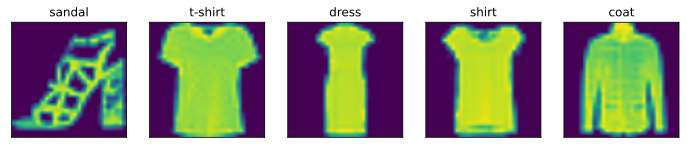

In [3]:
# 图像展示
from matplotlib import pyplot as plt
from IPython import display

def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    """Use svg format to display plot in jupyter"""
    display.set_matplotlib_formats('svg')
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((96, 96)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

# 读取训练数据集中第一个batch的数据
train_data = iter(train_iter)
images, labels = next(train_data)
# 观察训练数据集中前10个样本的图像内容和文本标签
labels = get_fashion_mnist_labels(labels)
show_fashion_mnist(images[:10], labels[:10])
plt.show()

## 模型设计
- 自行设计一个神经网络模型
    - 卷积层 - 归一化 - 激活函数 - 池化层
    - resnet_block1模块
    - resnet_block2模块
    - resnet_block3模块
    - resnet_block4模块
    - 全局平均池化层 - 展平 - 全连接层(output = 10)

In [4]:
class Residual(nn.Module):
    # 可以设定输出通道数、是否使用额外的1x1卷积层来修改通道数以及卷积层的步幅。
    def __init__(self,in_c,out_c,c1,c2,c3,c4,use_11conv= False,stride = 1):
        #在使用torch构建模型前必须要声明nn.Module函数
        super(Residual,self).__init__()

            # 线路1，单1 x 1卷积层
        self.p1_1 = nn.Conv2d(in_c, c1, kernel_size=1, stride=stride)
        # 线路2，1 x 1卷积层后接3 x 3卷积层
        self.p2_1 = nn.Conv2d(in_c, c2[0], kernel_size=1, stride=stride)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1 x 1卷积层后接5 x 5卷积层
        self.p3_1 = nn.Conv2d(in_c, c3[0], kernel_size=1, stride=stride)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3 x 3最大池化层后接1 x 1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_c, c4, kernel_size=1, stride=stride)
        if use_11conv:
            self.conv1 = nn.Conv2d(in_c, out_c, kernel_size=1, stride=stride)
        else:
            self.conv1 = None
        self.bn = nn.BatchNorm2d(out_c)
    

    def forward(self, X):
        p1 = F.relu(self.p1_1(X))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(X))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(X))))
        p4 = F.relu(self.p4_2(self.p4_1(X)))
        Y = self.bn(torch.cat((p1, p2, p3, p4), dim=1))
        if self.conv1:
            X = self.conv1(X)

        return F.relu(Y + X)

def resnet_block(in_c, out_c, c1, c2, c3, c4, num_residuals, first_block=False):
    if first_block:
        assert in_c == out_c # 第一个模块的通道数同输入通道数一致
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(in_c, out_c, c1, c2, c3, c4, use_11conv=True, stride=2))
        else:
            blk.append(Residual(out_c, out_c, c1, c2, c3, c4))
    return nn.Sequential(*blk)


class GlobalAvgPool2d(nn.Module):
    # 全局平均池化层可通过将池化窗口形状设置成输入的高和宽实现
    def __init__(self):
        super(GlobalAvgPool2d, self).__init__()
    def forward(self, x):
        return F.avg_pool2d(x, kernel_size=x.size()[2:])


class FlattenLayer(torch.nn.Module):  #展平操作
    def forward(self, x):
        return x.view(x.shape[0], -1)

# torch.nn.Sequential是一个Sequential容器，模块将按照构造函数中传递的顺序添加到模块中。
net = nn.Sequential(
    	# 添加第一个卷积层，调用了nn里面的Conv2d()
        nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
        # 进行数据的归一化处理
    	nn.BatchNorm2d(32),
    	# 修正线性单元，是一种人工神经网络中常用的激活函数
        nn.ReLU(),
    	# 再进行最大池化处理
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

# 依次添加resnet_block模块
net.add_module("resnet_block1", resnet_block(32, 32, 8, (4, 8), (4, 8), 8, 2, first_block=True))
net.add_module("resnet_block2", resnet_block(32, 80, 16, (16, 32), (8, 16), 16, 2))
net.add_module("resnet_block3", resnet_block(80, 192, 32, (32, 64), (32, 64), 32, 2))
net.add_module("resnet_block4", resnet_block(192, 320, 64, (64, 128), (32, 64), 64, 2))
# 添加GlobalAvgPool2d模块
net.add_module("global_avg_pool", GlobalAvgPool2d()) # GlobalAvgPool2d的输出: (Batch, 256, 1, 1)
# 添加FlattenLayer模块，再接一个全连接层
net.add_module("fc", nn.Sequential(FlattenLayer(), nn.Linear(320, 10)))
# 模型定义-ResNet
print(net)
#本质上是将模型进行模块化搭建，然后在net中逐层进行添加

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (resnet_block1): Sequential(
    (0): Residual(
      (p1_1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
      (p2_1): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
      (p2_2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (p3_1): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
      (p3_2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (p4_1): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
      (p4_2): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Residual(
      (p1_1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
      


当调用nn.Module为父类的类时，将会自动调用forward函数
而上文仅将类用于构建，还未对其本身进行声明使用


In [5]:
print('打印 1*1*96*96 输入经过每个模块后的shape')
X = torch.rand((1, 1, 96, 96))
for name, layer in net.named_children():
    X = layer(X)
    print(name, ' output shape:\t', X.shape)
#这个时候就是使用了forward了

打印 1*1*96*96 输入经过每个模块后的shape
0  output shape:	 torch.Size([1, 32, 96, 96])
1  output shape:	 torch.Size([1, 32, 96, 96])
2  output shape:	 torch.Size([1, 32, 96, 96])
3  output shape:	 torch.Size([1, 32, 48, 48])
resnet_block1  output shape:	 torch.Size([1, 32, 48, 48])
resnet_block2  output shape:	 torch.Size([1, 80, 24, 24])
resnet_block3  output shape:	 torch.Size([1, 192, 12, 12])
resnet_block4  output shape:	 torch.Size([1, 320, 6, 6])
global_avg_pool  output shape:	 torch.Size([1, 320, 1, 1])
fc  output shape:	 torch.Size([1, 10])


## 训练模型

In [6]:
def evaluate_accuracy(data_iter, net, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')):
    """Evaluate accuracy of a model on the given data set."""
    acc_sum, n = torch.tensor([0], dtype=torch.float32, device=device), 0
    for X, y in data_iter:
        # If device is the GPU, copy the data to the GPU.
        X, y = X.to(device), y.to(device)
        net.eval()
        with torch.no_grad():
            y = y.long()
            # [[0.2 ,0.4 ,0.5 ,0.6 ,0.8] ,[ 0.1,0.2 ,0.4 ,0.3 ,0.1]] => [ 4 , 2 ]
            acc_sum += torch.sum((torch.argmax(net(X), dim=1) == y))
            n += y.shape[0]
    return acc_sum.item() / n

In [7]:
def train_ch(net, train_iter, test_iter, criterion, num_epochs, device, lr=None):
    """Train and evaluate a model with CPU or GPU."""
    print('training on', device)
    net.to(device) #需要将模型与数据放在同一位置（cpu或者GPU）
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=5e-4)  # 优化函数
    best_test_acc = 0
    for epoch in range(num_epochs):
        train_l_sum = torch.tensor([0.0], dtype=torch.float32, device=device)
        train_acc_sum = torch.tensor([0.0], dtype=torch.float32, device=device)
        n, start = 0, time.time()
        for X, y in train_iter:
            net.train()
            optimizer.zero_grad()  # 清空梯度
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                y = y.long()
                train_l_sum += loss.float()
                train_acc_sum += (torch.sum((torch.argmax(y_hat, dim=1) == y))).float()
                n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net, device)  # 测试验证集
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))
        if test_acc > best_test_acc:
            print('find best! save at model/best.pth')
            best_test_acc = test_acc
            torch.save(net.state_dict(), 'model/best.pth')

调用net.train()会将模型net切换到训练模式。

该方法对神经网络模型产生以下几个效果:

批规范化层(BatchNorm Layer)会开始跟踪每批数据的均值和方差,并使用它们来规范化数据。在评估模式下,批规范化层会使用整个训练数据集预计的统计信息来规范化。
Dropout层会按照设定的比例随机丢弃一些节点,对网络正则化,防止过拟合。在评估模式下,Dropout层会保持所有节点,不进行丢弃。
有些层或优化器会在训练和评估模式采用不同的行为,例如BatchNorm、Dropout、LN(LayerNorm)等。
一些模块如BatchNorm和Dropout在训练模式下需要更新参数(rolling averages等),评估模式下不更新。
网络的可微性会打开,也就是允许计算梯度,以进行backpropagation。评估模式下会关闭可微性,速度更快。
采样一些损失函数(如负采样)的方式会在训练和评估模式下有细微差异。


调用 net.eval() 会将模型 net 切换到评估(evaluation)模式。

这与训练模式(调用 net.train())的主要区别在于:

批规范化层会使用整个训练数据集预计算的统计信息(运行均值、方差)来进行规范化,而不是使用当前批量的统计。
Dropout层会保持所有节点,不进行随机丢弃。
整个网络图会处于验证模式,用于预测或推理,而不是训练。
计算图的自动求导机制被关闭。不会计算梯度,以节省内存和计算资源。
一些训练相关的增强或损失计算方式会被关闭或修改,以适应验证模式。
BatchNorm, Dropout等层不会更新统计参数。
总之,eval模式主要用于在验证集或测试集上评估模型,计算预测指标如accuracy。它可以禁用训练所需的许多模块与机制,使模型固定住只进行推理,从而获得更准确、稳定的验证性能。

在训练结束后,一般会持续保持eval模式来进行模型评估。而在每个epoch结束时,则需要先调用eval模式来得到那个epoch的模型在验证集上的指标。

In [8]:
# 超参数设置
lr, num_epochs = 0.001, 7
criterion = nn.CrossEntropyLoss()   #交叉熵描述了两个概率分布之间的距离，交叉熵越小说明两者之间越接近
train_ch(net, train_iter, test_iter, criterion, num_epochs, device, lr)

training on cuda


epoch 1, loss 0.1022, train acc 0.818, test acc 0.884, time 433.1 sec
find best! save at model/best.pth
epoch 2, loss 0.0615, train acc 0.889, test acc 0.903, time 327.6 sec
find best! save at model/best.pth
epoch 3, loss 0.0518, train acc 0.907, test acc 0.908, time 319.0 sec
find best! save at model/best.pth
epoch 4, loss 0.0466, train acc 0.917, test acc 0.918, time 332.9 sec
find best! save at model/best.pth
epoch 5, loss 0.0433, train acc 0.922, test acc 0.921, time 316.7 sec
find best! save at model/best.pth
epoch 6, loss 0.0405, train acc 0.929, test acc 0.918, time 311.0 sec
epoch 7, loss 0.0381, train acc 0.932, test acc 0.922, time 309.2 sec
find best! save at model/best.pth


# 作业
试从神经网络模型的自行设计角度出发，提升一下测试集精度，并感受一下模型改变造成的影响。

In [9]:

# torch.nn.Sequential是一个Sequential容器，模块将按照构造函数中传递的顺序添加到模块中。
net = nn.Sequential(
    	# 添加第一个卷积层，调用了nn里面的Conv2d()
        nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
        # 进行数据的归一化处理
    	nn.BatchNorm2d(32),
    	# 修正线性单元，是一种人工神经网络中常用的激活函数
        nn.ReLU(),
    	# 再进行最大池化处理
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

# 依次添加resnet_block模块
net.add_module("resnet_block1", resnet_block(32, 32, 8, (4, 8), (4, 8), 8, 2, first_block=True))
net.add_module("resnet_block2", resnet_block(32, 80, 16, (16, 32), (8, 16), 16, 2))
net.add_module("Relu1",nn.ReLU())
net.add_module("resnet_block3", resnet_block(80, 192, 32, (32, 64), (32, 64), 32, 2))
net.add_module("resnet_block4", resnet_block(192, 320, 64, (64, 128), (32, 64), 64, 2))
# 添加GlobalAvgPool2d模块
net.add_module("global_avg_pool", GlobalAvgPool2d()) # GlobalAvgPool2d的输出: (Batch, 256, 1, 1)
# 添加FlattenLayer模块，再接一个全连接层
net.add_module("fc", nn.Sequential(FlattenLayer(), nn.Linear(320, 10)))
# 模型定义-ResNet
print(net)
#本质上是将模型进行模块化搭建，然后在net中逐层进行添加

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (resnet_block1): Sequential(
    (0): Residual(
      (p1_1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
      (p2_1): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
      (p2_2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (p3_1): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
      (p3_2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (p4_1): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
      (p4_2): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Residual(
      (p1_1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
      

In [10]:
# 超参数设置
lr, num_epochs = 0.001, 7
criterion = nn.CrossEntropyLoss()   #交叉熵描述了两个概率分布之间的距离，交叉熵越小说明两者之间越接近
train_ch(net, train_iter, test_iter, criterion, num_epochs, device, lr)

training on cuda
epoch 1, loss 0.1039, train acc 0.814, test acc 0.881, time 307.8 sec
find best! save at model/best.pth
epoch 2, loss 0.0634, train acc 0.885, test acc 0.897, time 316.6 sec
find best! save at model/best.pth
epoch 3, loss 0.0535, train acc 0.904, test acc 0.904, time 346.2 sec
find best! save at model/best.pth
epoch 4, loss 0.0475, train acc 0.914, test acc 0.908, time 368.4 sec
find best! save at model/best.pth
epoch 5, loss 0.0430, train acc 0.923, test acc 0.919, time 330.7 sec
find best! save at model/best.pth
epoch 6, loss 0.0405, train acc 0.928, test acc 0.917, time 378.2 sec
epoch 7, loss 0.0383, train acc 0.933, test acc 0.915, time 365.9 sec
